['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail', 'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail', 'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail', 'Pasta - Retail', 'Tomatoes - Retail', 'Groundnuts (shelled) - Retail', 'Bread (common) - Retail', 'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail', 'Cabbage - Retail', 'Meat (mutton) - Retail', 'Oil (sunflower) - Retail', 'Salt - Retail', 'Coffee (instant) - Retail', 'Peas (green, dry) - Retail', 'Apples (red) - Retail', 'Cauliflower - Retail', 'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail', 'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail', 'Tea - Retail', 'Fuel (petrol-gasoline) - Retail', 'Transport (public) - Retail', 'Tomatoes (paste) - Retail', 'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail', 'Yogurt - Retail', 'Bread (pita) - Retail', 'Cucumbers - Retail', 'Fish (fresh) - Retail', 'Spinach - Retail', 'Cheese - Retail', 'Meat (veal) - Retail', 'Eg

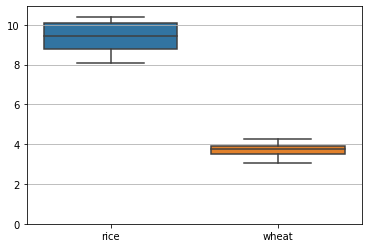

Ttest_indResult(statistic=53.751692036304206, pvalue=7.110465285860583e-55)


C:\Users\USER\AppData\Local\Temp\ipykernel_14300\4236374372.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tea_and_coffee['time-place'] = df_tea_and_coffee['time'].astype(str) +'-'+df_tea_and_coffee['Place']


WilcoxonResult(statistic=9838.0, pvalue=0.0004122034397612688)

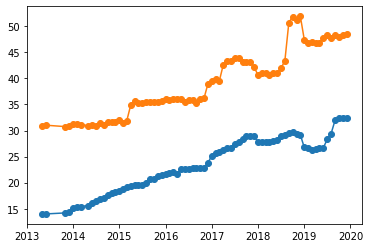

In [10]:
#[Thực hành] Phân tích dữ liệu trên bộ dữ liệu FoodPrice in Turkey
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv('FoodPrice_in_Turkey.csv')
#với mức ý nghĩa 5% kiểm định giả thuyết giá bán gạo trung bình năm 2019 là 10 Lira/kg
#liệt kê tên các sản phẩm
product_names = list(df['ProductName'].unique()) 
print(product_names)
# Lọc những bản ghi liên quan tới giá gạo năm 2019
df_rice = df.loc[(df.ProductName== 'Rice - Retail') & (df.Year == 2019)]
print ('Số lượng bản ghi của gạo năm 2019: ' +str(df_rice.shape[0])) 
df_rice.Price.hist()
#H0 = 9.5
#H1 # 9.5
print( stats.ttest_1samp(df_rice.Price, 9.5))
#Giá trị pvalue >5% nên không đủ cơ sở để để bác bỏ giả thuyết không
#Kết luận: Với mức ý nghĩa 5% có thể nhận định giá gạo trung bình bằng 9.5 Lira/kg

# Với mức ý nghĩa 5% hãy kiểm định giả thuyết: Giá bột mỳ và giá gạo ở Turkey năm 2019 là bằng nhau

# lấy thông tin bột mỳ năm 2019
df_wheat = df.loc[(df.ProductName== 'Wheat flour - Retail') & (df.Year == 2019)]
print ('Số lượng bản ghi của bột mỳ năm 2019: '+str(df_wheat.shape[0])) 
import seaborn as sns
# Tạo boxplot so sánh phân bố của bột mỳ vào gao
price = {'rice': list(df_rice["Price"]), 'wheat': list(df_wheat['Price'])}
df_price = pd.DataFrame(price)
sns.boxplot(data=df_price)
plt.show()
#H0: giá bột mì và gạo là giống nhau
print(stats.ttest_ind(price['rice'], price['wheat'], equal_var=False))
#Chúng ta có thể thấy Pvalue = 7.1.10^-55 <<5%, bác bỏ giả thuyết không, chấp nhận giả thuyết đối
#Kết luận: giá bột mỳ và giá gạo trung bình năm 2019 là khác nhau

#Vẽ biểu đồ sự biến đổi giá gạo trung bình từ năm 1/2014 đến năm 1/2019 và tìm mối liên hệ giữa giá Trà và giá Cà phê

# xóa những biến không cần thiết
del (df_rice, df_price, df_wheat, price)
# chuyển đổi dữ liệu ngày tháng
df['time'] =  pd.to_datetime(df['Year'].astype(str) + '/'+df['Month'].astype(str))
# thực hiện tính toán và vẽ giá trà, caffe theo tháng
df_Tea_all = df.loc[(df.ProductName == 'Tea - Retail')]
df_Tea_all_mean_by_month = df_Tea_all.groupby('time')['Price'].mean()
plt.plot_date(df_Tea_all_mean_by_month.index, df_Tea_all_mean_by_month.values, linestyle ='solid')

df_Coffee_all = df.loc[(df.ProductName == 'Coffee - Retail')]
df_Coffee_all_mean_by_month = df_Coffee_all.groupby('time')['Price'].mean()
plt.plot_date(df_Coffee_all_mean_by_month.index, df_Coffee_all_mean_by_month.values, linestyle ='solid')

# Tiền xử lý dữ liệu
# Tạo một data frame thông tin gồm chứa time - place, giá trà, giá cafe
df_tea_and_coffee = df.loc[(df.ProductName.isin(['Tea - Retail','Coffee - Retail']))]

df_tea_and_coffee['time-place'] = df_tea_and_coffee['time'].astype(str) +'-'+df_tea_and_coffee['Place']
df1 = df_tea_and_coffee[df_tea_and_coffee.ProductName =='Tea - Retail'].filter(['time-place',  'Price'])
df1 = df1.rename(columns = {'Price':'Tea - Retail'})

df2 = df_tea_and_coffee[df_tea_and_coffee.ProductName =='Coffee - Retail'].filter(['time-place', 'Price'])
df2 = df2.rename(columns = {'Price':'Coffee - Retail'})

Processed_data = pd.merge(df1, df2, on = 'time-place')
Processed_data.head()

#Giả thuyết không: giá cà phê bằng giá trà công thêm 15 Lira ở mọi thời điểm
#Giả thuyết đối: Giá giá cà phê luôn hơn giá trà 15 Lira ở mọi thời điểm

# thực hiện biến đổi dữ liệu
d = Processed_data['Coffee - Retail']-Processed_data['Tea - Retail'] - 15
# Thực hiện kiểm định wilcolxon
from scipy import stats
# thực hiện kiểm định với giả thuyết đối được định nghĩa ở trên
stats.wilcoxon(d, alternative='greater')

#Do pvalue <1% rất nhiều –> Bác bỏ giả thuyết không, chấp nhận giả thuyết đối 
#Giá Cà phê luôn lớn hơn giá trà ít nhất 15 lira mà không bị ảnh hưởng bởi thời gian hay địa điểm

In [ ]:
#[Thực hành] phân tích dữ liệu trên bộ dữ liệu Quản lý chất lượng
#Yêu cầu: Tiến hành viết giả thuyết kiểm định về chất lượng sản phẩm với mức ý nghĩa 0.01.
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_excel('data\Quality.xlsx')
print(df.head())
df.info()
# Tiền xử lý dữ liệu
# gom hết dữ liệu của 4 mẫu thành 1 mảng duy nhất
sample = list()
for i in df.columns:
    sample.extend(df[i].tolist())

# tiến hành mô tả dữ liệu mẫu
df = pd.DataFrame(columns=['sample'], data= sample) 
df.describe()
#Giả thuyết không: khối lượng trung bình của sản phẩm = 12
#Giả thuyết đối: Khối lượng trung bình của sản phẩm # 12
print (stats.ttest_1samp(sample,12))
#Do pvalue > 0.01 –> Chấp nhận giả thuyết 0.

5 bản ghi đầu tiên của bộ dữ liệu 
     Ohio  Atlanta
STT               
1    0.88     3.85
2    2.06     0.00
3    0.00     0.00
4    0.70     0.02
5    1.64     0.58
thông tin bộ dữ liệu
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ohio     50 non-null     float64
 1   Atlanta  50 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB
None
mô tả bộ dữ liệu
            Ohio    Atlanta
count  50.000000  50.000000
mean    1.746800   1.614800
std     1.092211   1.061068
min     0.000000   0.000000
25%     0.835000   0.682500
50%     1.615000   1.495000
75%     2.350000   2.402500
max     5.000000   3.860000
Ttest_indResult(statistic=0.6129544104328379, pvalue=0.5413275550760535)


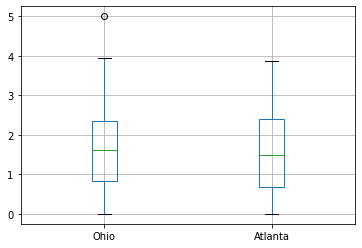

In [13]:
import pandas as pd
from scipy import  stats
import matplotlib.pyplot as plt
df = pd.read_excel("Coca_cola_use.xlsx", index_col= 'STT')
print ("5 bản ghi đầu tiên của bộ dữ liệu ")
print (df.head())
print ("thông tin bộ dữ liệu")
print (df.info())
print ("mô tả bộ dữ liệu")
print (df.describe())
df.boxplot()
#Giả thuyết không: a1-a2 =0
#Giả thuyết đối: a1-a2>0
#mức ý nghĩa 5%
#Loại kiểm định Independent T test
print (stats.ttest_ind(df.Ohio, df.Atlanta,equal_var=False))
#Chúng ta nhìn thấy rằng: pvalue > 5% rất nhiều nên không đủ cơ sở để bác bỏ giả thuyết không
#Kết luận: Không đủ căn cứ để kết luận rằng lượng tiêu thụ coca trung bình ở Ohio lớn hơn ở Atlanta

In [4]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv('GDPlist.csv',encoding = "ISO-8859-1")
print(df.info())
#Trung bình GDP của các quốc gia trên thế giới là 500 tỉ usd/năm
#H0: Trung bình GDP của các quốc gia trên thế giới là 500 tỉ usd/năm
#H1: Trung bình GDP của các quốc gia trên thế giới không là 500 tỉ usd/năm
print( stats.ttest_1samp(df["GDP (millions of US$)"], popmean=500000))
#pvalue = 71% --> H0 tương đối chính xác với xác suất chính xác tối thiểu là 70%

#GDP trung bình ở các quốc gia ở châu Âu cao hơn châu Á không
#H0: trung bình ở các quốc gia ở châu Âu cao hơn châu Á
#H1: trung bình ở các quốc gia ở châu Âu không cao hơn châu Á

euro = df.query("Continent == 'Europe'")['GDP (millions of US$)']
asia = df.query("Continent == 'Asia'")['GDP (millions of US$)']
tstatic, pvalue = stats.ttest_ind(euro, asia, alternative='greater')
print(tstatic, pvalue)
#Kết luận: các nước châu âu giàu hơn châu á với xác suất chính xác nhỏ nhất là 71%

#GDP trung bình của các quốc gia ở châu Âu và châu Mỹ là bằng nhau
#H0: GDP trung bình của các quốc gia ở châu Âu và châu Mỹ là bằng nhau
#H1: GDP trung bình của các quốc gia ở châu Âu và châu Mỹ là không bằng nhau
a = ['South America', 'North America']
america = df.query("Continent in @a")['GDP (millions of US$)']
print(stats.ttest_ind(america, euro, equal_var=False))
#Kết luận: Không thể kết luận châu và châu Mỹ có GDP bằng nhau

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB
None
Ttest_1sampResult(statistic=0.3757438669518338, pvalue=0.7077493494055246)
-0.5586877419842816 0.7109336599036772
Ttest_indResult(statistic=0.7882914270473153, pvalue=0.43961393931830917)


Ttest_indResult(statistic=7.583860613033518, pvalue=6.44185782026874e-14)
Ttest_indResult(statistic=-2.1462117638680636, pvalue=0.016128906608806812)


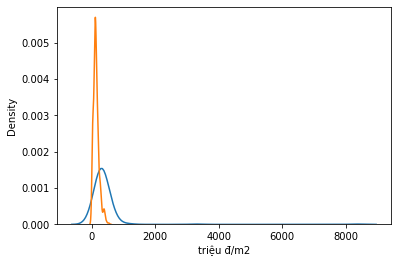

In [24]:
#[Bài tập] Kiểm định House Price Đống Đa Hà Nội
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('house_price_Dống-Da_Hà-Nội_subdata.csv')
data["triệu đ/m2"] = data.price/data.area
data.drop(data.loc[data["area"] == 0].index,axis = 0,inplace = True)
data.dropna(subset=['triệu đ/m2'],inplace=True)
data['land_certificate'] = data['land_certificate'].fillna("0")
#Vẽ biểu đồ so sánh phân phối giá (triệu đ/m2) giữa nhà Phố và Nhà ngõ
nhapho = data.query("property_type == 'mat pho'")['triệu đ/m2']
nhango = data.query("property_type == 'trong ngo'")['triệu đ/m2']
sns.kdeplot(nhapho)
sns.kdeplot(nhango);

#Kiểm định giả thuyết giá (triệu đ/m2) nhà mặt phố cao hơn giá nhà trong ngõ với mức ý nghĩa 5%
#H0: giả thuyết giá (triệu đ/m2) nhà mặt phố cao hơn giá nhà trong ngõ
#H1: giả thuyết giá (triệu đ/m2) nhà mặt phố không cao hơn giá nhà trong ngõ

print(stats.ttest_ind(nhapho, nhango, alternative='greater'))

#Ho sai. kết luận: nhà mặt phố không cao hơn giá nhà trong ngõ

#Giá của những căn nhà không có thông tin về giấy tờ pháp lý thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý 
#với mức ý nghĩa 5%
#H0: nhà không có thông tin về giấy tờ pháp lý thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý 
#H1: nhà không có thông tin về giấy tờ pháp lý ko thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý 
land_certificate = data.query("land_certificate == 'So do'")['triệu đ/m2']
not_certificate = data.query("land_certificate == '0'")['triệu đ/m2']
print(stats.ttest_ind(land_certificate, not_certificate, alternative='less'))
##Ho sai. kết luận: nhà không có thông tin về giấy tờ pháp lý ko thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý 

In [35]:
#[Bài tập] Kiểm định giả thuyết trên bộ dữ liệu credit scoring
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Credit_Scoring.csv", encoding = "ISO-8859-1")
df.dropna(subset=['NumberOfDependents'],inplace=True)
df.dropna(subset=['MonthlyIncome'],inplace=True)

#Có phải những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình theo tháng (MonthlyIncome)
#nhỏ hơn những khách hàng có người phụ thuộc không (với mức ý nghĩa 10%)
#H0: khách hàng không có người phụ thuộc sẽ có thu nhập nhỏ hơn những khách hàng có người phụ thuộc
#H1: khách hàng không có người phụ thuộc sẽ có thu nhập không nhỏ hơn những khách hàng có người phụ thuộc

Dependent = df.query("NumberOfDependents != 'So do'")['MonthlyIncome']
not_Dependent = df.query("NumberOfDependents == 0")['MonthlyIncome']
print(stats.ttest_ind(not_Dependent, Dependent, alternative='less'))
#H0 sai: khách hàng không có người phụ thuộc sẽ có thu nhập không nhỏ hơn những khách hàng có người phụ thuộc

#Có phải trung bình số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây (SeriousDlqin2yrs =1) 
#thì sẽ cao hơn những khách hàng không gặp khó khăn không với mức ý nghĩa 10%
#H0: trung bình số lượng khoản vay những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây cao hơn
#H1: trung bình số lượng khoản vay những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây không cao hơn
SeriousDlqin2yrs = df.query("SeriousDlqin2yrs == 1")['NumberOfOpenCreditLinesAndLoans']
Not_SeriousDlqin2yrs = df.query("SeriousDlqin2yrs == 0")['NumberOfOpenCreditLinesAndLoans']
print(stats.ttest_ind(SeriousDlqin2yrs, Not_SeriousDlqin2yrs, alternative='greater'))
#H0 sai : trung bình số lượng khoản vay những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây không cao hơn

Ttest_indResult(statistic=-12.472535446813929, pvalue=5.4475951849119754e-36)
Ttest_indResult(statistic=-9.533971212477503, pvalue=1.0)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

kích thước bộ dữ liệu:  (66, 8)
mô tả bộ dữ liệu


C:\Users\USER\AppData\Local\Temp\ipykernel_8476\2062676445.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rice['time'] =  pd.to_datetime(df_rice['Year'].astype(str) + '/'+df_rice['Month'].astype(str))


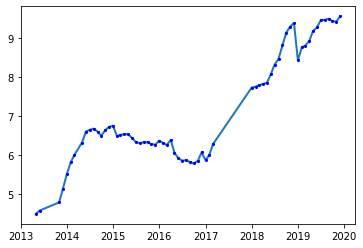

C:\Users\USER\AppData\Local\Temp\ipykernel_8476\2062676445.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rice['time_processed'] = df_rice.Month + (df_rice.Year -2013)*12


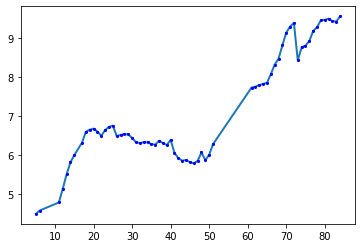

hệ số tương quan và pvalue tương ứng là: 
 PearsonRResult(statistic=0.8836736355854854, pvalue=8.931326276853373e-23)


In [1]:
#[Thực hành] Kiểm định tương quan trên dữ liệu Food Price in Turkey
# Khai báo thư viện
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
# đọc dữ liệu
df = pd.read_csv("FoodPrice_in_Turkey.csv")
# lọc dữ liệu gạo bán lẻ (Rice - Retail) ở National Average
df_rice = df[(df.ProductName == "Rice - Retail") & ( df.Place == "National Average")]
print("kích thước bộ dữ liệu: " ,df_rice.shape)
print ("mô tả bộ dữ liệu")
df_rice.describe()

# vẽ mối hiên hệ giữa thời gian và giá gạo
df_rice['time'] =  pd.to_datetime(df_rice['Year'].astype(str) + '/'+df_rice['Month'].astype(str))
plt.plot(df_rice['time'], df_rice['Price'], linewidth = 2, marker = '*', markersize=2, markerfacecolor='red', markeredgecolor = 'blue', markeredgewidth=2)
plt.show()
# Biến đổi thời gian
df_rice['time_processed'] = df_rice.Month + (df_rice.Year -2013)*12
# Vẽ lại biểu đồ liên hệ giữa time_processed và giá gạo
plt.plot(df_rice['time_processed'], df_rice['Price'], linewidth = 2, marker = '*', markersize=2, markerfacecolor='red', markeredgecolor = 'blue', markeredgewidth=2)
plt.show()

#Giả thuyết không: Giữa thời gian và giá gạo không có mối tương quan
#Giả thuyết đối: Giữa thời gian và giá gạo có mối tương quan
print  ("hệ số tương quan và pvalue tương ứng là: \n",stats.pearsonr(df_rice.time_processed, df_rice.Price))
#Nhận xét: Do pvalue ~0, và hệ số tương quan =0.88 nên giữ thời gian và giá gạo có mối tương quan thuận rất chặt với nhau



In [2]:
#[Thực hành] Kiểm định tương quan trên bộ dữ liệu shopeep_koreantop_clothing_shop_data
import pandas as pd
from scipy import  stats

df = pd.read_csv("shopeep_koreantop_clothing_shop_data.csv", encoding="UTF-8")
#Giả thuyết không: Giữa hai thuộc tính không có sự tương quan tuyến tính
#Giả thuyết đối: Giữa hai thuộc tính có sự tương quan tuyến tínhIn 
df1 = df.filter(["rating_star", "follower_count"])
df1 = df1.dropna()
print(stats.pearsonr(df1.rating_star, df1.follower_count))
#do p value > 5% nên không có đủ cơ sở bác bỏ giả thuyết không
#Kết luận: giữa rating_star và follower_count không có mối tương quan tuyến tính

#Giả thuyết không: Giữa hai thuộc tính không có sự tương quan tuyến tính
#Giả thuyết đối: Giữa hai thuộc tính có sự tương quan tuyến tínhI
df1 = df.filter(["rating_star", "item_count"])
df1 = df1.dropna()
print(stats.pearsonr(df1.rating_star, df1.item_count))
#do p value > 5% nên không có đủ cơ sở bác bỏ giả thuyết không
#Kết luận: giữa rating_star và item_count không có mối tương quan tuyến tính

#Giả thuyết không: Giữa hai thuộc tính không có sự tương quan tuyến tính
#Giả thuyết đối: Giữa hai thuộc tính có sự tương quan tuyến tính
df1 = df.filter(["is_shopee_verified", "is_official_shop"])
df1 = df1.dropna()
print(stats.pearsonr(df1.is_shopee_verified, df1.is_official_shop))
#do p value > 5% nên không có đủ cơ sở bác bỏ giả thuyết không
#Kết luận: giữa is_shopee_verified và is_official_shop không có mối tương quan tuyến tính

PearsonRResult(statistic=0.027490059846301027, pvalue=0.4552522676325689)
PearsonRResult(statistic=-0.037326260709207325, pvalue=0.3105727616062792)
PearsonRResult(statistic=-0.0445890090436061, pvalue=0.22382403995765798)


In [3]:
#[Thực hành] Kiểm định tương quan trên bộ dữ liệu Covid 19
# khai báo thư viện
import pandas as pd
from scipy import  stats
# đọc bộ dữ liệu
df = pd.read_csv("subset-covid-data.csv")
#Có mối tương quan nào giữa số ca mắc và ca tử vong ở các quốc gia hay không
#Giả thuyết không: Không có mối tương quan tuyến tính giữa hai biến
#Giả thuyết đối:  có mối tương quan tuyến tính giữa hai biến
# lọc dữ liệu
df1 = df.filter(['cases', 'population'])
# xóa bỏ dữ liệu null
df1 = df1.dropna()
r, pvalue = stats.pearsonr(df1.cases, df1.population)
print ("r: ", r, "; pvalue: ", pvalue)
#Nhận xét: do pvalue <5%, nên với mức ý nghĩa 5% bác bỏ giả thuyết không, chấp nhận giả thuyết đối
#Kết luận: Giữa dân số và số ca nhiễm có tương quan tuyến tính yếu với nhau

#Có mối tương quan nào giữa số ca mắc (cases) và số ca tử vong (deaths) hay không
#Có mối tương quan nào giữa số ca mắc (cases) và số ca tử vong (deaths) hay không
#Giả thuyết đối:  có mối tương quan tuyến tính giữa hai biến

# lọc dữ liệu
df2 = df.filter(['cases', 'deaths'])
# xóa bỏ dữ liệu null
df2 = df2.dropna()
r, pvalue = stats.pearsonr(df2.cases, df2.deaths)
print ("r: ", r, "; pvalue: ", pvalue)
#Nhận xét: do pvalue ~0, nên với mức ý nghĩa 5% bác bỏ giả thuyết không, chấp nhận giả thuyết đối
#Kết luận: Giữa số ca mắc và số ca tử vong có tương quan tuyến tính mạnh với nhau

#Biến đổi lại thuộc tính population về dạng thứ bậc thực hiện kiểm định tương quan giữa biến này với số ca nhiễm
# tiến hành tính các khoảng tứ phân vị của population
q1, q2, q3  = df1.population.quantile(0.25), df1.population.quantile(0.5), df1.population.quantile(0.75)
# tiến hành biến đổi population
def population_order(population):
    if population < q1:
        return 1
    elif population>=q1 and population <q2:
        return 2
    elif population>=q2 and population <q3:
        return 3
    else: 
        return 4

df1['population_ordinal']=df1.population.apply(population_order)
df1.head()
#Giả thuyết không: Giữa population_ordinal và case không có tương quan 
#Giả thuyết đối: Giữa population_ordinal và case có tương quan
r, pvalue = stats.spearmanr(df1.cases, df1.population_ordinal)
print ("r: ", r, "; pvalue: ", pvalue)
#Pvalue ~0, và r~0.5 chứng tỏ giữa thuộc tính population_ordinal và số ca nhiễm bệnh có tương quan với nhau
# Như vậy có thể thấy, việc biến đổi dữ liệu thành các khoảng có thể làm nổi bật thông tin tương quan giữa cá thuộc tính.

r:  0.17553926594294003 ; pvalue:  0.01246031070420893
r:  0.9432201374746727 ; pvalue:  1.3451948745846463e-99
r:  0.49498466493711596 ; pvalue:  6.982786622314858e-14


[Bài tập] Kiểm định tương quan của các thuộc tính trên bộ dữ liệu house price Đống Đa
Mô tả
Bộ dữ liệu mô tả về giá nhà ở địa bàn Đống Đa, Hà Nội với hai loại hình nhà trong ngõ và nhà phố được lưu trữ trong file house_price_Đống Đa_Hà Nội_subdata.csv. Hãy tiến hành kiểm định tương quan giữa các thuộc tính sau với mức ý nghĩa 5%. Trong đó giá nhà (price) đang được để theo đơn vị (nghìn đồng)

Giữa giá nhà và diện tích có tương quan với nhau?
Giữa giá nhà và tọa độ địa lý (lat, long) có tương quan với nhau
Giữa thuộc tính land_certificate và property_type có tương quan với nhau
Hãy  mã hóa lại thuộc tính giá nhà theo đơn vị (nghìn đồng/m2) và sắp xếp giá nhà thành 4 mức tương ứng với các khoảng tứ phân vị. Tiến hành kiểm định tương quan giữa biến giá nhà này với các biến tọa độ vị trí (lat, long)

Hướng dẫn
Sử dụng pandas để đọc dữ liệu
Sử dụng kiểm định pearson để kiểm định tương quan giữa hai thuộc tính định lượng
Kiểm định Chi bình phương để kiểm định tương quan giữa hai thuộc tính định tính
Kiểm định spearman để kiểm định tương quan giữa một thuộc tính thứ bậc và một thuộc tính liên tục

In [5]:
import pandas as pd
from scipy import  stats
from scipy.stats import chi2_contingency
data=pd.read_csv('house_price_Dống-Da_Hà-Nội_subdata.csv')
data['land_certificate'] = data['land_certificate'].fillna("0")

#Giữa giá nhà và diện tích có tương quan với nhau?
#Giả thuyết không: Không có mối tương quan tuyến tính giữa hai biến
#Giả thuyết đối: Không có mối tương quan tuyến tính giữa hai biến
# lọc dữ liệu
df1 = data.filter(['area', 'price'])
# xóa bỏ dữ liệu null
df1 = df1.dropna()
r, pvalue = stats.pearsonr(df1.area, df1.price)
print ("r: ", r, "; pvalue: ", pvalue)
#giữa giá nhà và diện tích có mối tương quan tuyến tính ko chặt

#Giữa giá nhà và tọa độ địa lý (lat, long) có tương quan với nhau
#Giả thuyết không: Không có mối tương quan tuyến tính giữa hai biến
#Giả thuyết đối: Không có mối tương quan tuyến tính giữa hai biến
df2 = data.filter(['lat', 'price', "long"])
# xóa bỏ dữ liệu null
df2 = df2.dropna()
r, pvalue = stats.pearsonr(df2.lat, df2.price)
print ("r: ", r, "; pvalue: ", pvalue)
#giữa giá nhà và lat không có mỗi tương quan với nhau

#Giữa thuộc tính land_certificate và property_type có tương quan với nhau
#Giả thuyết không: Không có mối tương quan tuyến tính giữa hai biến
#Giả thuyết đối: Không có mối tương quan tuyến tính giữa hai biến
df3 = data.filter(['land_certificate', 'property_type'])
# xóa bỏ dữ liệu null
df3 = df3.dropna()
contigency= pd.crosstab(df3['land_certificate'], df3['property_type'])
c, p, dof, expected = chi2_contingency(contigency)
print (p)
#Giữa thuộc tính land_certificate và property_type không có tương quan với nhau

#Tiến hành kiểm định tương quan giữa biến giá nhà này với các biến tọa độ vị trí (lat, long)
# tiến hành tính các khoảng tứ phân vị của price
q1, q2, q3  = df2.price.quantile(0.25), df2.price.quantile(0.5), df2.price.quantile(0.75)
# tiến hành biến đổi price
def price_order(price):
    if price < q1:
        return 1
    elif price>=q1 and price <q2:
        return 2
    elif price>=q2 and price <q3:
        return 3
    else: 
        return 4

df2['price_ordinal']=df2.price.apply(price_order)
df2.head()
#Giả thuyết không: Giữa price_ordinal và lat không có tương quan 
#Giả thuyết đối: Giữa price_ordinal và let có tương quan
r, pvalue = stats.spearmanr(df2.lat, df2.price_ordinal)
print ("r: ", r, "; pvalue: ", pvalue)
#giữa giá nhà và lat không có mỗi tương quan với nhau

r:  0.2285210190679815 ; pvalue:  9.947613326077628e-09
r:  -0.054832054570723675 ; pvalue:  0.17374717212660112
0.21106331497658834
r:  -0.03170195930800819 ; pvalue:  0.4318316994113417


[Bài tập] Kiểm định tương quan của các thuộc tính trên bộ dữ liệu Credit Scoring
Mô tả
Bộ dữ liệu đánh giá mức độ tín nhiệm của khách hàng được lưu trong file Credit_Scoring.csv đã được giới thiệu từ các buổi trước. Với mức ý nghĩa 5% hãy thực hiện các kiểm định sau:

Giữa độ tuổi (age) và thu nhập trung bình theo tháng (MonthlyIncome) có tương quan với nhau hay không?
Giữa số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) và độ tuổi có tương quan với nhau không
Giữa (số lượng người phụ thuộc) NumberOfDependents và thu nhập theo tháng (MonthlyIncome) có tương quan với nhau hay không
Mã hóa lại thuộc tính MonthlyIncome thành thuộc tính MonthlyIncome_order theo các khoảng tứ phân vị, giữa thuộc tính mới này và tình trạng nợ xấu trong 2 năm trở lại đây (SeriousDlqin2yrs) có liên quan tới nhau không
Giữa thuộc tính MonthlyIncome_order với thuộc tính tỉ lệ số dư tài khoản (RevolvingUtilizationOfUnsecuredLines) có mối liên hệ với nhau không

Hướng dẫn
Sử dụng pandas để đọc dữ liệu
Sử dụng kiểm định pearson để kiểm định tương quan giữa hai thuộc tính định lượng
Kiểm định Chi bình phương để kiểm định tương quan giữa hai thuộc tính định tính
Kiểm định spearman để kiểm định tương quan giữa một thuộc tính thứ bậc và một thuộc tính liên tục


In [15]:
import pandas as pd
from scipy import  stats
data = pd.read_csv("Credit_Scoring.csv", encoding = "ISO-8859-1")
data['NumberOfDependents'] = data['NumberOfDependents'].fillna("0")
#Giữa độ tuổi (age) và thu nhập trung bình theo tháng (MonthlyIncome) có tương quan với nhau hay không?

#Giả thuyết không: Không có mối tương quan tuyến tính giữa hai biến
#Giả thuyết đối: có mối tương quan tuyến tính giữa hai biến
# lọc dữ liệu
df1 = data.filter(['age', 'MonthlyIncome'])
# xóa bỏ dữ liệu null
df1 = df1.dropna()
r, pvalue = stats.pearsonr(df1.age, df1.MonthlyIncome)
print ("r: ", r, "; pvalue: ", pvalue)
#gần như không có mối tương quan giữa age và monthlyincome (r < 0.2)

#Giữa số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) và độ tuổi có tương quan với nhau không
#Giả thuyết không: Không có mối tương quan tuyến tính giữa hai biến
#Giả thuyết đối: có mối tương quan tuyến tính giữa hai biến
# lọc dữ liệu
df2 = data.filter(['age', 'NumberOfOpenCreditLinesAndLoans'])
# xóa bỏ dữ liệu null
df2 = df2.dropna()
r, pvalue = stats.pearsonr(df2.age, df2.NumberOfOpenCreditLinesAndLoans)
print ("r: ", r, "; pvalue: ", pvalue)
#gần như không có mối tương quan giữa age và NumberOfOpenCreditLinesAndLoans (r < 0.2)

#Giữa (số lượng người phụ thuộc) NumberOfDependents và thu nhập theo tháng (MonthlyIncome) có tương quan với nhau hay không
#Giả thuyết không: Không có mối tương quan tuyến tính giữa hai biến
#Giả thuyết đối: có mối tương quan tuyến tính giữa hai biến
# lọc dữ liệu
df3 = data.filter(['MonthlyIncome', 'NumberOfDependents'])
# xóa bỏ dữ liệu null
df3 = df3.dropna()
r, pvalue = stats.pearsonr(df3.MonthlyIncome, df3.NumberOfDependents)
print ("r: ", r, "; pvalue: ", pvalue)
#giữa người phụ thuộc và thu nhập theo tháng gần như không mối tương quan (r < 0.2)

#Mã hóa lại thuộc tính MonthlyIncome thành thuộc tính MonthlyIncome_order theo các khoảng tứ phân vị, 
#giữa thuộc tính mới này và tình trạng nợ xấu trong 2 năm trở lại đây (SeriousDlqin2yrs) có liên quan tới nhau không
# tiến hành tính các khoảng tứ phân vị của MonthlyIncome
df3 = data.filter(['MonthlyIncome', 'SeriousDlqin2yrs'])
q1, q2, q3  = df3.MonthlyIncome.quantile(0.25), df3.MonthlyIncome.quantile(0.5), df3.MonthlyIncome.quantile(0.75)
# tiến hành biến đổi MonthlyIncome
def MonthlyIncome_order(MonthlyIncome):
    if MonthlyIncome < q1:
        return 1
    elif MonthlyIncome>=q1 and MonthlyIncome <q2:
        return 2
    elif MonthlyIncome>=q2 and MonthlyIncome <q3:
        return 3
    else: 
        return 4

df3['MonthlyIncome_ordinal']=df3.MonthlyIncome.apply(MonthlyIncome_order)

#Giả thuyết không: Không có mối tương quan tuyến tính giữa hai biến
#Giả thuyết đối: có mối tương quan tuyến tính giữa hai biến
r, pvalue = stats.spearmanr(df3.SeriousDlqin2yrs, df3.MonthlyIncome_ordinal)
print ("r: ", r, "; pvalue: ", pvalue)
#gần như không có mối tương quan

#Giữa thuộc tính MonthlyIncome_order với thuộc tính tỉ lệ số dư tài khoản (RevolvingUtilizationOfUnsecuredLines) 
#có mối liên hệ với nhau không
#Giả thuyết không: Không có mối tương quan tuyến tính giữa hai biến
#Giả thuyết đối: có mối tương quan tuyến tính giữa hai biến
# tiến hành tính các khoảng tứ phân vị của MonthlyIncome
df4 = data.filter(['MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines'])
q1, q2, q3  = df4.MonthlyIncome.quantile(0.25), df4.MonthlyIncome.quantile(0.5), df4.MonthlyIncome.quantile(0.75)
# tiến hành biến đổi MonthlyIncome
def MonthlyIncome_order(MonthlyIncome):
    if MonthlyIncome < q1:
        return 1
    elif MonthlyIncome>=q1 and MonthlyIncome <q2:
        return 2
    elif MonthlyIncome>=q2 and MonthlyIncome <q3:
        return 3
    else: 
        return 4

df4['MonthlyIncome_ordinal']=df4.MonthlyIncome.apply(MonthlyIncome_order)

#Giả thuyết không: Không có mối tương quan tuyến tính giữa hai biến
#Giả thuyết đối: có mối tương quan tuyến tính giữa hai biến
r, pvalue = stats.spearmanr(df4.RevolvingUtilizationOfUnsecuredLines, df4.MonthlyIncome_ordinal)
print ("r: ", r, "; pvalue: ", pvalue)
#gần như không có mối tương quan

r:  0.03772151543470266 ; pvalue:  3.9646572343167475e-39
r:  0.1477041318012584 ; pvalue:  0.0
r:  0.06267144549170811 ; pvalue:  6.2118089878121526e-105
r:  -0.06360863338099153 ; pvalue:  2.9013160286258947e-134
r:  -0.10569575091167942 ; pvalue:  0.0


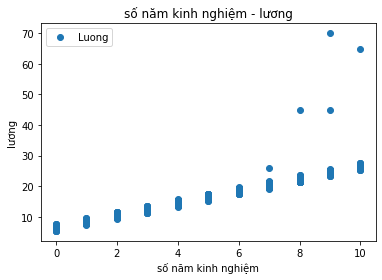

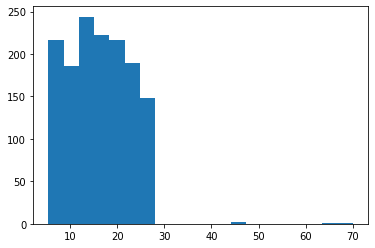

Kết cấu bộ dữ liệu
Số lượng mẫu nhân viên kế toán: 472
Số lượng mẫu nhân viên HCNH: 566
Số lượng mẫu nhân viên SALE: 388


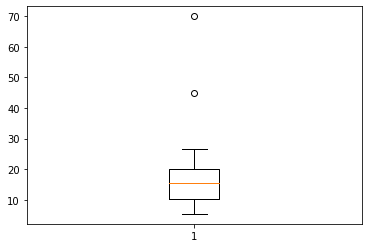

Mô hình hồi quy sẽ có dạng: Lương = a + b * số năm kinh nghiệm 
với các hệ số a và b lần lượt là
[6.35592115]
[[2.03289729]]
R2 trên tập huấn luyện của model là:0.9318331044271062
R2 trên tập kiểm tra của model là:0.8762196686203844


Đánh giá năng lực dự báo trung bình trên tập test
Sai số dự báo trung bình: 0.5566819767125358


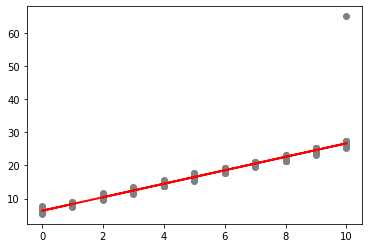

array([[ 8.38881844],
       [10.42171574],
       [14.48751032]])

In [26]:
#[Thực hành] Xây dựng mô hình hồi quy tuyến tính dự báo tiền lương
import pandas as pd # Khai báo thư viện hỗ trợ đọc và phân tích dữ liệu ở dạng bảng
dataset = pd.read_csv("salary_data.csv") # Lấy dữ liệu từ file work_data.csv đê phân tích và đặt tên dữ liệu đó là dataset
import matplotlib.pyplot as plt  # Khai báo thư viện để vẽ hình
dataset.plot(x='SoNamKinhNghiem', y='Luong', style='o')  
plt.title('số năm kinh nghiệm - lương')  
plt.xlabel('số năm kinh nghiệm')  
plt.ylabel('lương')  
plt.show()
# vẽ biểu đồ histogram
plt.hist(dataset['Luong'],20)
plt.show()
df_keToan = dataset[dataset["NganhNghe"] == "KeToan"]
df_hcnh = dataset[dataset["NganhNghe"] == "HCNS"]
df_sale = dataset[dataset["NganhNghe"] == "Sale"]

print ("Kết cấu bộ dữ liệu")
print ("Số lượng mẫu nhân viên kế toán: " + str(df_keToan.shape[0]))
print ("Số lượng mẫu nhân viên HCNH: " + str(df_hcnh.shape[0]))
print ("Số lượng mẫu nhân viên SALE: " + str(df_sale.shape[0]))

n_by_nganhNghe = dataset.groupby("NganhNghe")["Luong"].mean()

# Biểu đồ phân bố lương của nhân viên Kế toán
plt.boxplot(df_keToan['Luong'])
plt.show()

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

X = dataset['SoNamKinhNghiem'].values.reshape(-1,1)
y = dataset['Luong'].values.reshape(-1,1)
# chia bộ dữ liệu làm 2 tập train và test theo tỉ lệ 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  # Khai báo mô hình hồi quy tuyến tính
regressor.fit(X_train, y_train) #Huấn luyện mô hình
print( "Mô hình hồi quy sẽ có dạng: Lương = a + b * số năm kinh nghiệm \nvới các hệ số a và b lần lượt là")
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test) # dự đoán trên số năm kinh nghiệm của bộ dữ liệu test
## tính toán R2 của model
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, regressor.predict(X_train))
print("R2 trên tập huấn luyện của model là:" + str(r2_train))
r2_test = r2_score(y_test, y_pred)
print("R2 trên tập kiểm tra của model là:" + str(r2_test))

df = pd.DataFrame({'số năm kinh nghiệm': X_test.flatten(), 'Lương Thực tế': y_test.flatten(), 'Lương Dự báo': y_pred.flatten()})
print("\n") # xuống dòng
print("Đánh giá năng lực dự báo trung bình trên tập test")
print('Sai số dự báo trung bình:', metrics.mean_absolute_error(y_test, y_pred))  

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# lưu trữ mô hình vào máy tính
import pickle # thư viện  giúp lưu trữ mô hình
filename = 'model.sav'
pickle.dump(regressor, open(filename, 'wb'))

# Some time later.....
# sử dụng mô hình
#loaded_model = LinearRegression()
loaded_model = pickle.load(open(filename, 'rb'))
x = [[1],[2],[4]]
y_pred = loaded_model.predict(x)
y_pred

In [34]:
#[Thực hành] Xây dựng mô hình hồi quy tuyến tính trên bộ dữ liệu House Price
# Load in our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import os
df = pd.read_csv("AmesHousing.csv")
#Since Regression needs numerical features,convert categorical columns into dummy variables
df1= pd.get_dummies(df)
#Look for columns with any NaN(missing) values
df1.columns[df1.isna().any()].tolist()

#Number of NaN values columnwise
df1.isna().sum()
#Để xử lý dữ liệu bị thiếu ta thay bằng giá trị trung vị của cột tương ứng
#Ta định nghĩa hàm impute_median() để thực hiện việc này
#Define function to impute series with it's median
def impute_median(series):
    return series.fillna(series.median())
df1['Lot Frontage']= df1['Lot Frontage'].transform(impute_median)
df1['Mas Vnr Area']=df1['Mas Vnr Area'].transform(impute_median)
df1['BsmtFin SF 1']=df1['BsmtFin SF 1'].transform(impute_median)
df1['BsmtFin SF 2']=df1['BsmtFin SF 2'].transform(impute_median)
df1['Bsmt Unf SF']=df1['Bsmt Unf SF'].transform(impute_median)
df1['Total Bsmt SF']=df1['Total Bsmt SF'].transform(impute_median)
df1['Bsmt Full Bath']=df1['Bsmt Full Bath'].transform(impute_median)
df1['Bsmt Half Bath']=df1['Bsmt Half Bath'].transform(impute_median)
df1['Garage Cars']=df1['Garage Cars'].transform(impute_median)
df1['Garage Area']=df1['Garage Area'].transform(impute_median)
#Check remaining columns with NaN values
df1.columns[df1.isna().any()].tolist()
#Sau khi thay trung vị vẫn còn trường (cột) ‘Garage Yr Blt’ thiếu dữ liệu
#Drop this column
df2=df1.drop('Garage Yr Blt',axis=1)
#Define target array y
y= df2['SalePrice'].values

#Create feature array X
X= df2.drop('SalePrice',axis=1).values
#Reshape y to have 1 column
y=y.reshape(-1,1)

#Split the arrays into training and testing data sets
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

#Create a regressor object
LR= LinearRegression()
#Fit training set to the regressor
LR.fit(X_train,y_train)
#print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:")
#print("Intercept =", LR.intercept_)
#print("Coefficients:", LR.coef_)
#Make predictions with the regressor
y_prediction = LR.predict(X_test)
# Calculate R2-score
score=r2_score(y_test,y_prediction)
print('R2-score is ',score)
print('Mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('Root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

R2-score is  0.8955304226952793
Mean_sqrd_error is== 734361363.6166551
Root_mean_squared error of is== 27099.102634896513


[Bài tập] Xây dựng mô hình hồi quy tuyến tính dự báo doanh thu theo số tiền quảng cáo
Mô tả
Bộ dữ liệu chứa dữ liệu về chi phí quảng cáo và lượng hàng bán được của một doanh nghiệp, các thông tin được thống kê bao gồm:

TV: chi phí quảng cáo qua truyền hình (đơn vị nghìn USD)
Radio: chi phí quảng cáo qua radio (đơn vị nghìn USD)
Newspaper: chi phí quảng cáo qua báo chí (đơn vị nghìn USD)
Sales: số sản phẩm bán được (đơn vị nghìn)
File dữ liệu: advertising.csv

Hãy sử dụng bộ dữ liệu đã có để thực hiện:

Vẽ biểu đồ để trực quan hóa mối quan hệ giữa lượng sản phẩm được bán ra với lần lượt chi phí quảng  cáo trên TV, Radio và báo chí bằng hình ảnh, dùng 1 biểu đồ cho mỗi loại hình quảng cáo.
Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.
Từ dữ liệu huấn luyện xây dựng mô hình hồi quy tuyến tính đơn biến với biến đầu vào là chi phí quảng cáo trên TV và lượng hàng bán ra. Dùng dữ liệu kiểm tra để đánh giá mô hình. 
Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là lượng hàng bán ra, các biến đầu vào là chi phí cho cả 3 loại hình quảng cáo. Đánh giá mô hình.

Hướng dẫn
Sử dụng pandas để đọc dữ liệu
Sử dụng dụng biểu đồ scatter để trực quan hóa mối quan hệ giữa lượng sản phẩm bán ra và chi phí quảng cáo từng loại hình.
Sử dụng train_test_split() để chia dữ liệu thành dữ liệu huấn luyện và dữ liệu kiểm tra.
Sử dụng LinearRegression() trong thư viện scikit-learn cho mô hình hồi quy tuyến tính
Sử dụng mean_squared_error(), r2_score() để đánh giá mô hình

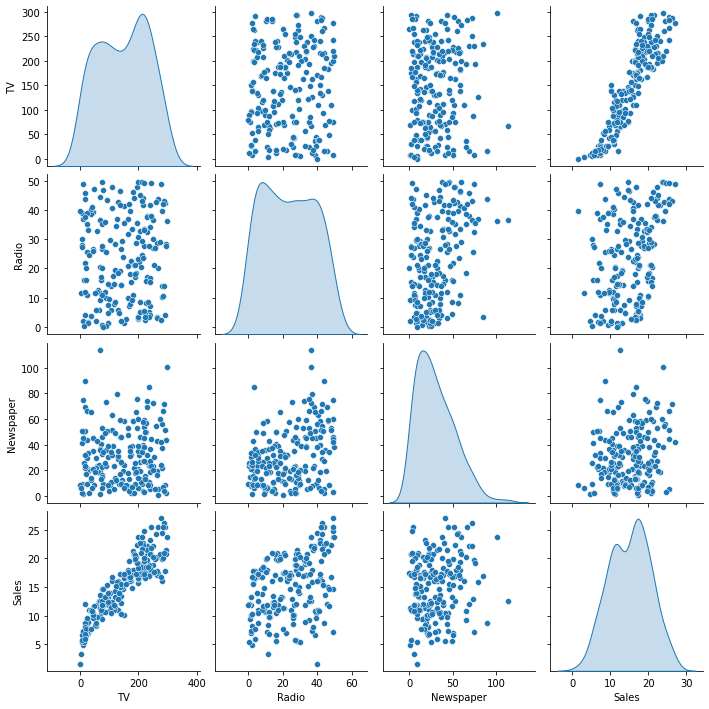

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
#Vẽ biểu đồ để trực quan hóa mối quan hệ giữa lượng sản phẩm được bán ra với lần lượt chi phí quảng  cáo trên TV, 
#Radio và báo chí bằng hình ảnh, dùng 1 biểu đồ cho mỗi loại hình quảng cáo.
data = pd.read_csv('advertising.csv')
sns.pairplot(data=data, diag_kind='kde');

0.7345626707131437

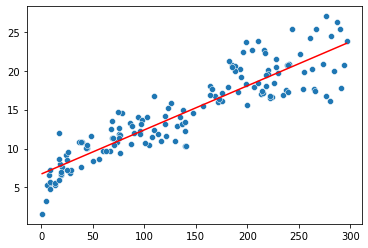

In [38]:
#Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.
#Từ dữ liệu huấn luyện xây dựng mô hình hồi quy tuyến tính đơn biến với biến đầu vào là chi phí quảng cáo trên TV và lượng hàng bán ra. 
#Dùng dữ liệu kiểm tra để đánh giá mô hình. 
import sklearn.model_selection as model_selection
import sklearn.linear_model as lm
learn, test = model_selection.train_test_split(data, test_size=0.25)
reg2 = lm.LinearRegression()
X = np.asarray(learn.loc[:,'TV'])
Y = np.asarray(learn.loc[:,'Sales'])
reg2.fit(X.reshape(-1, 1), Y)
Y_ = reg2.predict(X.reshape(-1,1))
sns.scatterplot(x=X, y=Y);
sns.lineplot(x=X, y=Y_, color='r');
y_pred = reg2.predict(np.array(test.TV).reshape(-1,1))
metrics.r2_score(test.Sales,y_pred)

In [41]:
#Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là lượng hàng bán ra
#các biến đầu vào là chi phí cho cả 3 loại hình quảng cáo. Đánh giá mô hình.

#Define target array y
y= data['Sales'].values

#Create feature array X
X= data.drop('Sales',axis=1).values
#Reshape y to have 1 column
y=y.reshape(-1,1)

#Split the arrays into training and testing data sets
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.3)

#Create a regressor object
LR= LinearRegression()
#Fit training set to the regressor
LR.fit(X_train,y_train)

y_prediction = LR.predict(X_test)
# Calculate R2-score
score=r2_score(y_test,y_prediction)
print('R2-score is ',score)

R2-score is  0.8551183194851572


[Bài tập] Xây dựng mô hình hồi quy tuyến tính dự đoán chi phí y tế cá nhân
Mô tả
Bộ dữ liệu chứa dữ liệu về chi phí y tế mỗi năm cho các hợp đồng bảo hiểm y tế, các thông tin được thống kê bao gồm các thông tin về người được bảo hiểm:

age: tuổi của người được bảo hiểm
sex: giới tính (male, female)
bmi: chỉ số trọng lượng cơ thể (body mass index)
children: số con
smoker: cho biết có phải người hút thuốc hay không (yes/no)
region: vùng sinh sống (northeast, northwest, southeast, southwest)
charges: chi phí y tế trong năm
File dữ liệu: insurance.csv

Hãy sử dụng bộ dữ liệu đã có để thực hiện:

Vẽ biểu đồ để trực quan hóa mối quan hệ giữa tuổi của người được bảo hiểm (age)  với chi phí y tế (charges); và mối quan hệ giữa chỉ số trọng lượng cơ thể (bmi) với chi phí y tế (charges).
Chuyển các biến có kiểu categorical: sex, smoker, region thành các biến “Dummy”: sex_female , sex_male, smoker_no, smoker_yes, region_northeast  region_northwest region_southeast, region_southwest. Sau đó loại bớt 2 trường không cần thiết:  sex_male, smoker_no.
Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.
Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là chi phí y tế, các biến đầu vào là các trường còn lại. Đánh giá mô hình.
Hướng dẫn
Sử dụng pandas để đọc dữ liệu
Sử dụng dụng biểu đồ scatter để trực quan hóa mối quan hệ giữa lượng sản phẩm bán ra và chi phí quảng cáo từng loại hình.
Dùng hàm pd.get_dummies() để chuyển các biến sex, smoker, region thành các biến “dummy” tương ứng. Xóa cột (trường) bằng hàm drop().
Sử dụng train_test_split() để chia dữ liệu thành dữ liệu huấn luyện và dữ liệu kiểm tra.
Sử dụng LinearRegression() trong thư viện scikit-learn cho mô hình hồi quy tuyến tính
Sử dụng mean_squared_error(), r2_score() để đánh giá mô hình

0.716582136050774

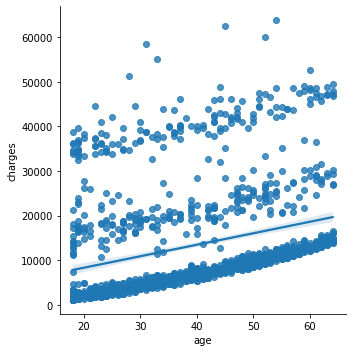

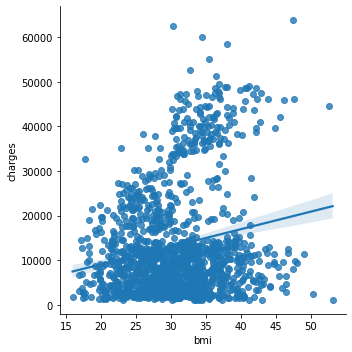

In [44]:
data = pd.read_csv('insurance.csv')
# Vẽ biểu đồ để trực quan hóa mối quan hệ giữa tuổi của người được bảo hiểm (age)  với chi phí y tế (charges); 
#và mối quan hệ giữa chỉ số trọng lượng cơ thể (bmi) với chi phí y tế (charges)

sns.lmplot(data=data, x='age', y='charges');
sns.lmplot(data=data, x='bmi', y='charges');

#Chuyển các biến có kiểu categorical: sex, smoker, region thành các biến “Dummy”: sex_female , sex_male, 
#smoker_no, smoker_yes, region_northeast  region_northwest region_southeast, region_southwest. 
#Sau đó loại bớt 2 trường không cần thiết:  sex_male, smoker_no
data1 = pd.get_dummies(data)
data1 = data1.drop(columns = ['sex_male', 'smoker_no'])

#Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra
train, test = model_selection.train_test_split(data1, train_size=0.6)
#Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là chi phí y tế, 
#các biến đầu vào là các trường còn lại. Đánh giá mô hình.

X = train.drop(columns=['charges'])
Y = train.loc[:,'charges']

#Sử dụng pipeline (kiểu mới)
#Tạo chuẩn hóa
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler(with_mean=False)

#Tạo model Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Tạo pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("StandardScaler", zscore),
                     ("linear_regression", model)])

#Fit
pipeline.fit(X,Y)

#Predict
Y_ = pipeline.predict(test.drop(columns=['charges']))

#Tính r2score
import sklearn.metrics as metrics
metrics.r2_score(test.loc[:,'charges'], Y_)

Mô tả bài toán
Công ty ô tô Geely Auto của Trung Quốc muốn gia nhập thị trường Mỹ bằng cách thành lập
nhà máy sản xuất của họ ở Mỹ để tạo sức cạnh tranh với các đối thủ Mỹ và Châu âu tại thị
trường Mỹ. Công ty Geely Auto đã ký hợp đồng với một công ty tư vấn ôtô để tìm hiểu các
yếu tác động tới giá ô tô. Cụ thể họ muốn tìm hiểu các đặc điểm của một chiếc xe sẽ ảnh
hưởng tới việc định giá ô tô tại thị trường Mỹ, vì có thể thị hiếu của người tiêu dùng Mỹ có
điểm khác biệt so với người tiêu dùng ở Trung quốc. Công ty muốn biết:

Có những thuộc tính nào có ý nghĩa trong việc định giá của một chiếc xe hơi
Các thuộc tính đó có liên hệ với giá xe như thế nào
Dựa trên các cuộc khảo sát thị trường, công ty tư vấn đã thu thập một tập dữ liệu về các loại
ô tô khác nhau trên thị trường Mỹ để phân tích.


car_ID : Mã xe
symboling: Mức độ an toàn (giá trị trong khoảng từ 2 tới 3, trong đó giá trị -2: tuyệt
đối an toàn, 3: có rủi ro)
carName: Tên xe
fueltype: Loại nhiên liệu
aspiration: loại hút (turbo hoặc std)
doornumber: Số lượng cửa
carbody: Loại thân xe (sedan, wagon, hatchback)
drivewheel: Loại bánh xe
enginelocation: Vị trí động cơ
wheelbase: Chiều dài cơ sở
carlength: Chiều dài xe
carwidth: Chiều rộng xe
carheight: Chiều cao xe
curbweight: Trọng lượng của xe khi không có người hoặc hành lý
enginetype: Loại động cơ
cylindernumber: Số lượng xi lanh đặt trong xe
enginesize: Kích thước động cơ
fuelsystem: Hệ thống nhiên liệu của xe ô tô
boreratio: Tỉ số hành trình
stroke: số kỳ hoăc kích thước bên trong động cơ
compressionratio: Tỉ số nén của ôtô
horsepower: Mã lực
peakrpm: Tốc độ động cơ cao nhất
citympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố
highwaympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc
price: Giá xe
Yêu cầu
Là một nhân viên phân tích dữ liệu, được bộ phận khảo sát thị trường cung cấp dữ liệu trên. Bạn hãy thực hiện những phân tích và xây dựng mô hình dự báo giá ô tô dựa trên các thuộc tính được thu thập. Theo đó các nhà quản lý có thể đưa ra những chiến lược kinh doanh, thiết kế xe, .. để đáp ứng với phân khúc thị trường mà họ muốn nhắm tới.

Hướng dẫn
Sử dụng pandas để đọc dữ liệu
Hiểu ý nghĩa của từng thuộc tính được cung cấp trong bộ dữ liệu
Tìm mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu
Xem xét kiểu dữ liệu của các thuộc tính, thực hiện chuyển đổi về đúng kiểu
Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả
tần số, tần suất, các phép kiểm định
Nhận xét các thuộc tính gây ảnh hưởng tới giá
Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng (xem xét
có những biến nào có tương quan lớn với nhau, chỉ giữa lại 1 trong các biến đó đưa
vào mô hình
Tiến hành mã hóa tạo ra các biến dumy từ các biến category (thang đo nominal) ban
đầu
Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn, sử dụng thêm feature
selection để chọn các thuộc tính tốt nhất.
Xây dựng mô hình hồi quy tuyến tính trên các biến được chọn bởi phương pháp
feature selection.
Có thể sử dụng thêm các thư viện khác để xây dựng mô hình như statsAPI.OLS
Đánh giá chất lượng 2 mô hình dựa trên các thông số như R_square, Tổng bình
phương sai số trung bình.[Case Study] Phân tích các nhân tố ảnh hưởng tới giá xe hơi


số lượng carname 147
số lượng carname 205


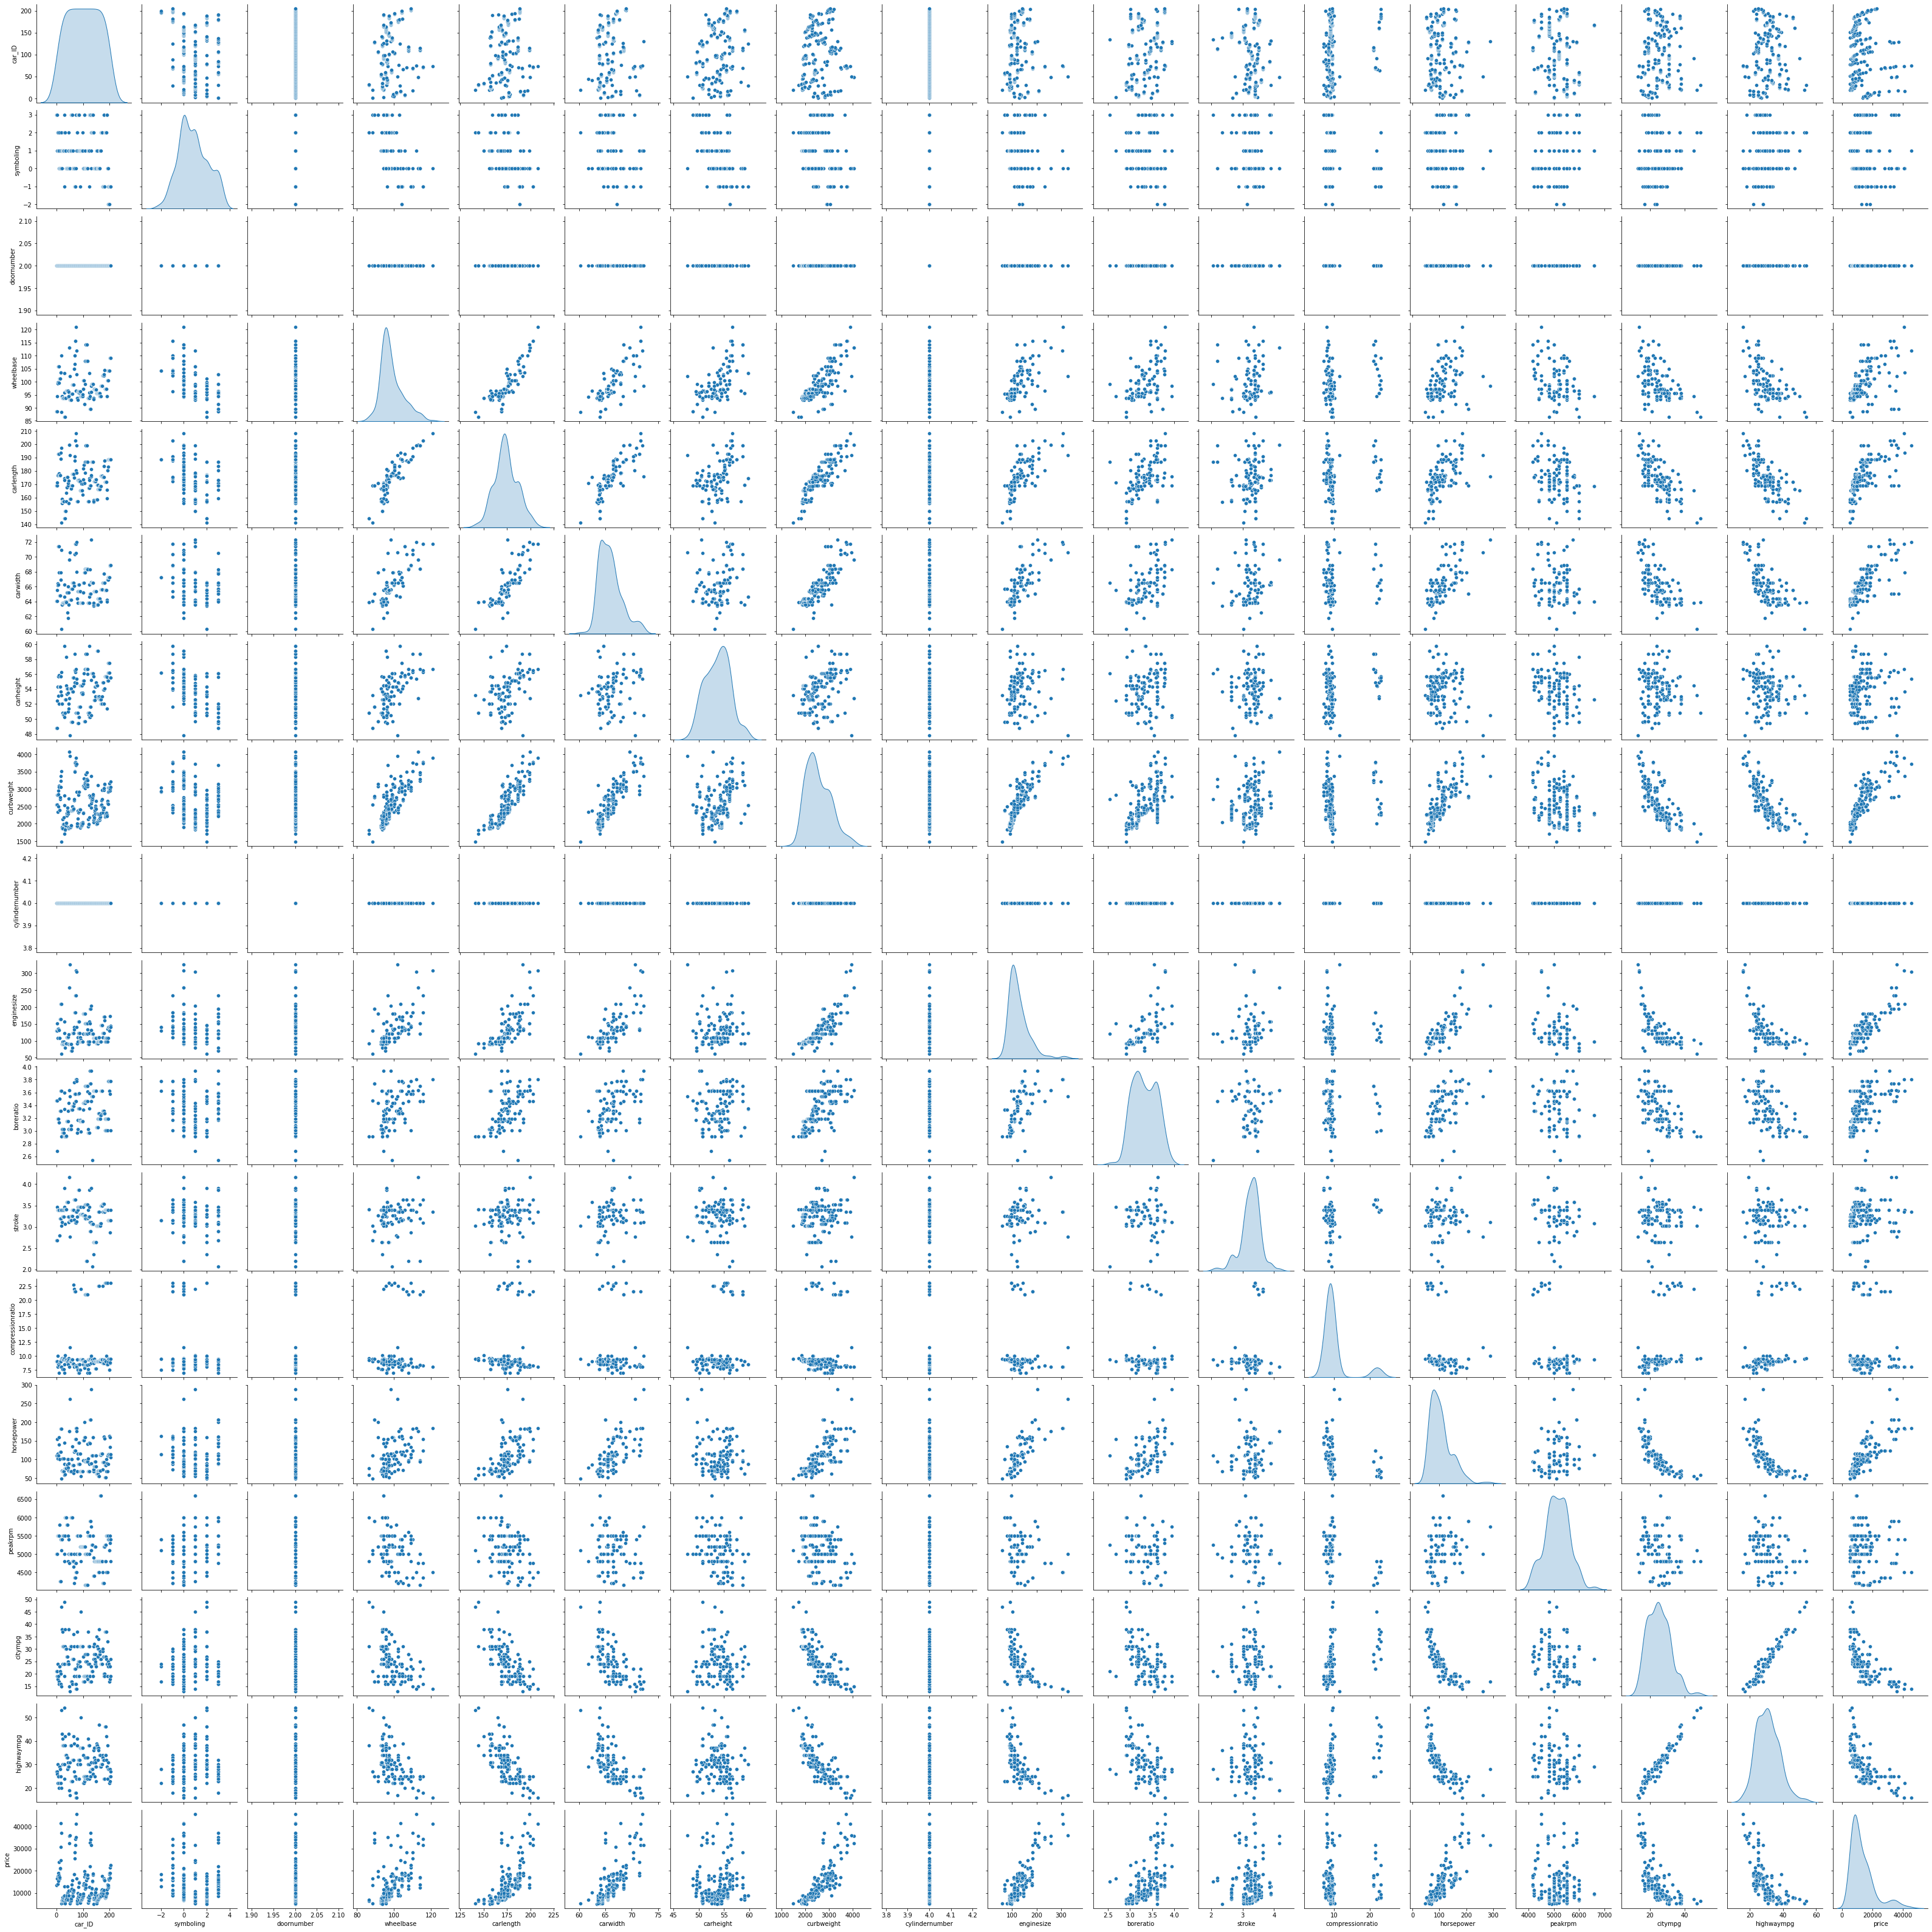

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from word2number import w2n

data = pd.read_csv("Case_study_CarPrice_Assignment.csv")
print("số lượng carname", len(data.CarName.unique()))
#số lượng carname 147 ==> dữ liệu đúng phải là 205
#biến đổi tên carname
data["CarName"] = data["CarName"] +"-"+ data["car_ID"].astype(str)
print("số lượng carname", len(data.CarName.unique()))

#cần chuyển dữ liệu doornumber  và cylindernumber về int64
data.doornumber = w2n.word_to_num(str(data.doornumber))
data.cylindernumber = w2n.word_to_num(str(data.cylindernumber))

#kiểm tra các mối liên hệ với giá

sns.pairplot(data=data, diag_kind='kde');
plt.savefig('saving-a-seaborn-plot-as-pdf-file.pdf')

In [23]:
#có thể thấy các giá cột : highwaympg, citympg, horsepower, boreratio,enginesize, curbweight, carwidth
#carlength có tương quan với price
from scipy import  stats
#tiến hành kiểm định:
List = ["highwaympg", "citympg", "horsepower", "boreratio","enginesize", "curbweight", "carwidth","carlength"]
#Giả thuyết không: Không có mối tương quan tuyến tính giữa hai biến
#Giả thuyết đối: có mối tương quan tuyến tính giữa hai biến
for i in List:
    r, pvalue = stats.spearmanr(data[i], data.price)
    print ("r: ",i, r, "; pvalue: ", pvalue)

#kết luận: giữa price và highwaympg, citympg có mối quan hệ tuyến tính nghịch nhau
#trong khi đó "horsepower", "boreratio","enginesize", "curbweight", "carwidth","carlength" có mối quan hệ tuyến tính
#thuận với price và có mối tương quan chặt

r:  highwaympg -0.8227291026518385 ; pvalue:  1.0749573921925921e-51
r:  citympg -0.8294792735586712 ; pvalue:  3.016616328395848e-53
r:  horsepower 0.8546096111609128 ; pvalue:  1.0967646925749507e-59
r:  boreratio 0.643771837994811 ; pvalue:  2.2096049099458725e-25
r:  enginesize 0.8259962487887911 ; pvalue:  1.9437256267293482e-52
r:  curbweight 0.9090666905857352 ; pvalue:  4.0026112686216925e-79
r:  carwidth 0.8114009910071677 ; pvalue:  3.112152823701878e-49
r:  carlength 0.8043161313862341 ; pvalue:  8.905307987812625e-48


<AxesSubplot: >

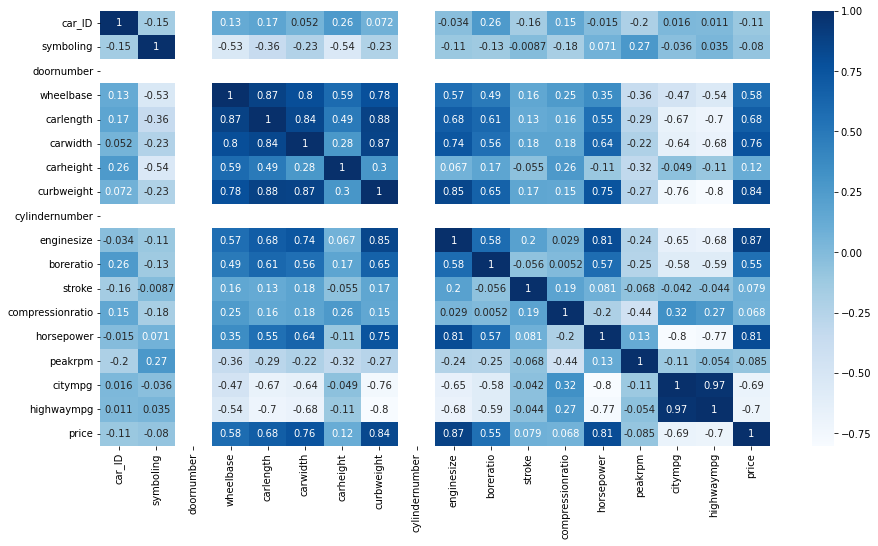

In [27]:
plt.figure(figsize=(15,8))
corr = data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
#có thể thấy các giá trị trong list có tương quan với price theo như diagram
#["highwaympg", "citympg", "horsepower", "boreratio","enginesize", "curbweight", "carwidth","carlength"]

In [35]:
import sklearn.model_selection as model_selection
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
#Xây dựng mô hình dự báo:
data1 = pd.get_dummies(data)

#Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra
train, test = model_selection.train_test_split(data1, train_size=0.7)
#Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là chi phí y tế, 
#các biến đầu vào là các trường còn lại. Đánh giá mô hình.

X = train.drop(columns=['price'])
Y = train.loc[:,'price']

#Sử dụng pipeline (kiểu mới)
#Tạo chuẩn hóa
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler(with_mean=False)

#Tạo model Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Tạo pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("StandardScaler", zscore),
                     ("linear_regression", model)])

#Fit
pipeline.fit(X,Y)

#Predict
Y_ = pipeline.predict(test.drop(columns=['price']))

#Tính r2score
import sklearn.metrics as metrics
metrics.r2_score(test.loc[:,'price'], Y_)
#mô hình tương đối chuẩn

0.835874851087216